In [1]:
class Args:
    def __init__(self):
        self.dataset = "enron"
        self.nt = 1000
        self.nq = 1000
        self.shuffle_seed = "808"
        self.embed = "cnn"
        self.maxl = 5000

In [2]:
from nns import load_vec
args = Args()
xq, xb, xt, train_dist, query_dist = load_vec(args)
query_dist = query_dist[:, :50000]
xb = xb[:50000, :]

# loading embeddings
#  (50000, 128) (1000, 128) (1000, 128)
# loading distances
# loaded train_dist
# loaded query_dist


In [3]:
from utils import l2_dist
from nns import linear_fit
print("distance")
train_dist_l2 = l2_dist(xt, xt)
query_dist_l2 = l2_dist(xq, xb)
print("fitting")
threshold2dist = linear_fit(train_dist, train_dist_l2)
print("fitted")

distance
fitting
fitted


In [4]:
import numpy as np
print(threshold2dist)
print(np.quantile(query_dist, 0.1))

 
0.0006002 x + 0.06361
235.0


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def analyze(q, x, ed, file):
    print("analyzing")
    l2 = l2_dist(q, x)
    idx = np.random.choice(np.size(l2), 1000)
    plt.scatter(ed.reshape(-1)[idx], l2.reshape(-1)[idx], color="r")
    plt.scatter(ed.reshape(-1)[idx], threshold2dist(ed.reshape(-1)[idx]), color="blue")
    
    plt.savefig(file)
    plt.show()
    

analyzing


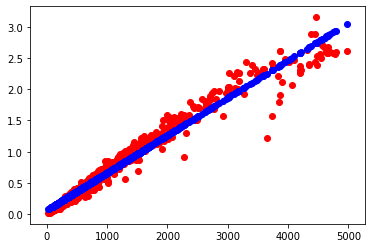

<Figure size 432x288 with 0 Axes>

In [6]:
analyze(xt, xt, train_dist, args.dataset + "_"+ args.embed + "_train.pdf")

In [7]:
xq.shape

(1000, 128)

In [8]:
xt.shape

(1000, 128)

In [9]:
xb.shape

(50000, 128)

In [10]:
query_dist.shape

(1000, 50000)

In [11]:
train_dist.shape

(1000, 1000)

analyzing


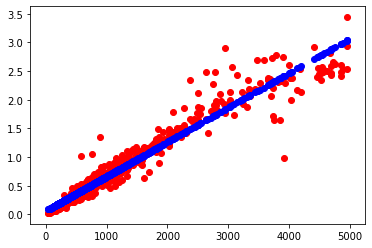

<Figure size 432x288 with 0 Axes>

In [12]:
analyze(xq, xb, query_dist, args.dataset +"_"+ args.embed + "_query.pdf")

In [27]:
import os
import time
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'

start = time.time()
d = l2_dist(xb[:40000], xb[:40000])
end = time.time()

In [28]:
end - start

10.459381580352783

In [29]:
d.shape

(40000, 40000)